In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [3]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [4]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [5]:
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [6]:
X = df.drop('FWI',axis=1)
y= df['FWI']


In [7]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [8]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


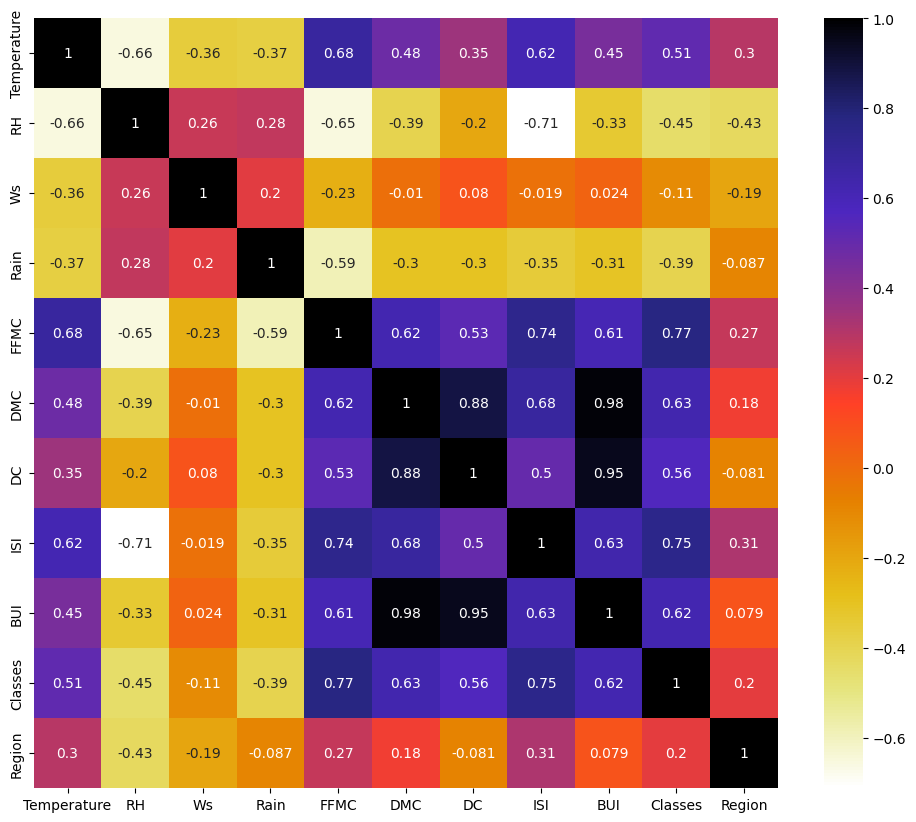

In [9]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(X_train, 0.75)
corr_features


{'BUI', 'Classes', 'DC'}

In [12]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

In [13]:
import joblib
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    joblib.dump(scaler, "scaler.pkl")
    return X_train_scaled, X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

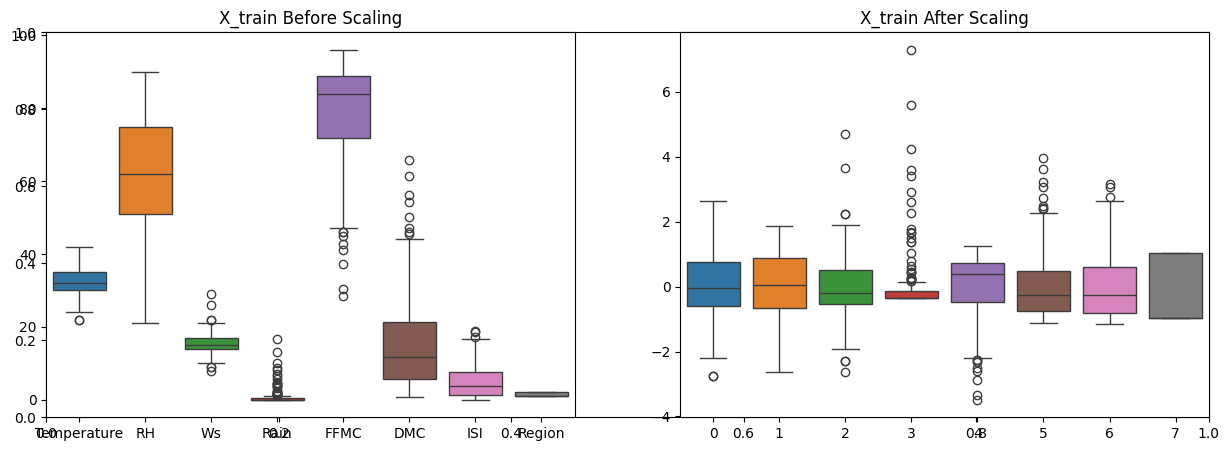

In [15]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.9700
MAE value: 0.6453


In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.9340
MAE value: 0.8676


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9790
MAE value: 0.5916


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize XGBoost Regressor
xgb = XGBRegressor()

# Train the model
xgb.fit(X_train_scaled, y_train)

# Predict on test data
xgb_pred = xgb.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

# Print results
print("XGBoost Regressor")
print("R² Score: {:.4f}".format(r2))
print("MAE: {:.4f}".format(mae))


XGBoost Regressor
R² Score: 0.9803
MAE: 0.5421


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# ✅ Fixed param_grid (Replaced 'auto' with None)
param_grid = [{
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    'max_features': ['sqrt', None],  # ✅ Fix: Replaced 'auto' with None
    'min_samples_leaf': [1, 3, 4],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [5, 20, 50, 100]
}]

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid,  # param_distributions is correct for RandomizedSearchCV
    n_iter=10,   # Number of random combinations to try
    cv=10,       # 10-fold cross-validation
    verbose=2,   
    n_jobs=-1,   # Use all CPU cores
    random_state=42  # Ensures reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['sqrt', None],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   random_state=42, verbose=2)

In [21]:
best_random_grid=random_search.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
bestrf_pred

array([1.07428880e+01, 6.77435245e+00, 7.41137897e+00, 4.36567063e+00,
       8.54345437e+00, 1.28958561e+01, 2.20315476e-01, 9.21955952e+00,
       6.40506674e+00, 1.31415902e+01, 1.70625397e+00, 1.41113071e+01,
       6.53367785e+00, 1.54416429e+01, 6.45883658e-01, 1.84863095e-01,
       1.64132431e+00, 2.23655159e+00, 5.29065476e+00, 1.84863095e-01,
       5.49840278e+00, 6.88145040e+00, 3.00249098e+00, 2.01160714e-01,
       2.61572222e+00, 2.79444841e+00, 9.61116865e+00, 3.49035714e-01,
       1.49113095e-01, 1.11231944e+00, 1.47696499e+01, 4.08250000e-01,
       2.59035714e-01, 2.23213552e+01, 5.33351190e+00, 8.15082071e-01,
       8.49724928e-01, 1.52490556e+01, 2.67926786e+01, 1.67746717e+00,
       7.11825992e+00, 8.29549603e-01, 1.04880952e-01, 2.18763889e+00,
       8.72773810e-01, 1.37500000e-02, 3.30479365e+00, 7.15819444e+00,
       2.00833333e-02, 4.94656944e+00, 5.36345238e+00, 1.04441201e+01,
       2.00833333e-02, 2.63238889e+00, 6.75673016e+00, 2.23478175e+00,
      

In [22]:
Actual_predicted = pd.DataFrame({'Actual Severity': y_test, 'Predicted Severity': bestrf_pred})    
Actual_predicted

,Actual Severity,Predicted Severity
110,9.7,10.742888
150,7.2,6.774352
37,8.0,7.411379
75,6.3,4.365671
109,7.7,8.543454
...,...,...
179,10.9,11.934065
160,3.1,3.204161
159,3.0,3.248744
170,17.3,20.233562


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute error metrics
meanAbErr = mean_absolute_error(y_test, bestrf_pred)  # ✅ Removed `metrics.`
meanSqErr = mean_squared_error(y_test, bestrf_pred)  # ✅ Removed `metrics.`
rootMeanSqErr = np.sqrt(meanSqErr)

# Compute R² Score
r2 = r2_score(y_test, bestrf_pred)

# Print results
print('📌 Mean Absolute Error:', meanAbErr)
print('📌 Mean Square Error:', meanSqErr)
print('📌 Root Mean Square Error:', rootMeanSqErr)
print('📌 R² Score:', r2)


📌 Mean Absolute Error: 0.6190595074324583
📌 Mean Square Error: 0.7390890894123053
📌 Root Mean Square Error: 0.8597029076444405
📌 R² Score: 0.9787094341950572


In [24]:
feature_importance = best_random_grid.feature_importances_

# ✅ Convert to a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assumes X_train_scaled is a DataFrame
    'Importance': feature_importance
})

# ✅ Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
6,ISI,0.518880
4,FFMC,0.247768
5,DMC,0.222068
2,Ws,0.005179
1,RH,0.005038
0,Temperature,0.000997
7,Region,0.000046
3,Rain,0.000025


In [25]:
X_train_new = X_train.drop(['Ws', 'RH','Region'], axis=1)
X_test_new = X_test.drop(['Ws', 'RH','Region'], axis=1)

In [26]:
X_train_new.columns

Index(['Temperature', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [27]:
X_test_new.columns

Index(['Temperature', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [28]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [29]:
best_random_grid.fit(X_train_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(X_test_new_scaled)
bestrf_pred

array([1.06873036e+01, 7.75351786e+00, 7.04883730e+00, 4.31242063e+00,
       8.10099008e+00, 1.27472569e+01, 2.20315476e-01, 9.21899603e+00,
       5.53390675e+00, 1.30553719e+01, 1.70558730e+00, 1.46299499e+01,
       6.32102345e+00, 1.53159623e+01, 6.59889610e-01, 1.85446429e-01,
       1.67255556e+00, 2.20305952e+00, 5.41600108e+00, 1.82446429e-01,
       5.48937500e+00, 5.64206151e+00, 3.04509921e+00, 2.01160714e-01,
       2.66572222e+00, 2.81228175e+00, 9.85519048e+00, 3.60535714e-01,
       1.45946429e-01, 1.09173611e+00, 1.44933869e+01, 4.10333333e-01,
       2.65369048e-01, 2.19054087e+01, 5.67591775e+00, 8.06286436e-01,
       8.60968975e-01, 1.48888175e+01, 2.78944841e+01, 1.67255556e+00,
       6.79925000e+00, 7.28129690e-01, 1.04023810e-01, 2.11311508e+00,
       8.26083333e-01, 1.42261905e-02, 3.30271032e+00, 7.03945833e+00,
       9.22619048e-03, 4.85881944e+00, 5.33144643e+00, 1.03995357e+01,
       9.22619048e-03, 2.57405556e+00, 6.42127038e+00, 2.16025794e+00,
      

In [30]:
Actual_predicted = pd.DataFrame({'Actual Severity': y_test, 'Predicted Severity': bestrf_pred})    
Actual_predicted

,Actual Severity,Predicted Severity
110,9.7,10.687304
150,7.2,7.753518
37,8.0,7.048837
75,6.3,4.312421
109,7.7,8.100990
...,...,...
179,10.9,12.102377
160,3.1,3.281244
159,3.0,3.283196
170,17.3,19.929970


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute error metrics
meanAbErr = mean_absolute_error(y_test, bestrf_pred)  # ✅ Removed `metrics.`
meanSqErr = mean_squared_error(y_test, bestrf_pred)  # ✅ Removed `metrics.`
rootMeanSqErr = np.sqrt(meanSqErr)

# Compute R² Score
r2 = r2_score(y_test, bestrf_pred)

# Print results
print('📌 Mean Absolute Error:', meanAbErr)
print('📌 Mean Square Error:', meanSqErr)
print('📌 Root Mean Square Error:', rootMeanSqErr)
print('📌 R² Score:', r2)


📌 Mean Absolute Error: 0.6127434428049181
📌 Mean Square Error: 0.7303535416434188
📌 Root Mean Square Error: 0.8546072440855031
📌 R² Score: 0.9789610747040025


In [64]:
import joblib

joblib.dump(best_random_grid, "fire_severity.pkl")

print("Trained Random Forest model saved successfully!")

Trained Random Forest model saved successfully!


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [34]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [35]:
X = df.iloc[:, 0:10]
y = df['Classes']

In [36]:
X.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [37]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [38]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((170, 10), (73, 10))

In [39]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [40]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [41]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [42]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [43]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9178
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.97      0.88      0.93        43

    accuracy                           0.92        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.92      0.92      0.92        73



In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9863
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        43

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



In [45]:
# KNeighborsClassifier to Train from SKlearn
knnc = KNeighborsClassifier()
knnc.fit(X_train_scaled,y_train)
knn_pred = knnc.predict(X_test_scaled)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9315
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.95      0.93      0.94        43

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73



In [46]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



In [47]:
Actual_predicted = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': xgb_pred})    
Actual_predicted

,Actual Class,Predicted Class
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [48]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1,random_state=42)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.20202020202020202), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(35), max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
Best_xgb = Random_xgb.best_estimator_
Best_xgb.score(X_test_scaled,y_test)

0.958904109589041

In [50]:
Bestxgb_pred = Best_xgb.predict(X_test_scaled)
Bestxgb_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [51]:
Actual_predicted = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': Bestxgb_pred})    
Actual_predicted

,Actual Class,Predicted Class
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [52]:
Score = accuracy_score(y_test, Bestxgb_pred)
Classification_Report = classification_report(y_test,Bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL XGB
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.93      0.96        43

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



In [53]:
feature_importances = Random_xgb.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
3,Rain,0.359037
4,FFMC,0.326744
0,Temperature,0.093488
6,ISI,0.093397
5,DMC,0.079508
1,RH,0.033701
2,Ws,0.014125


In [54]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [55]:
X_train_new = X_train.drop(['Ws', 'RH',], axis=1)
X_test_new = X_test.drop(['Ws', 'RH'], axis=1)

In [56]:
X_train_new.columns


Index(['Temperature', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [57]:
X_test_new.columns

Index(['Temperature', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [58]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [59]:
xgb_model =Random_xgb.fit(X_train_new_scaled, y_train).best_estimator_
xgb_model.score(X_test_new_scaled, y_test)

0.9726027397260274

In [60]:
xgb_model_pred = xgb_model.predict(X_test_new_scaled)
xgb_model_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [61]:
Actual_predicted = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': xgb_model_pred})    
Actual_predicted

,Actual Class,Predicted Class
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [62]:
Score = accuracy_score(y_test, xgb_model_pred)
Classification_Report = classification_report(y_test, xgb_model_pred)
print("Final Model XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Final Model XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



In [ ]:
import joblib

joblib.dump(xgb_model, "fire_classification.pkl")

print("Trained XGB model saved successfully!")

Trained XGB model saved successfully!
